# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [221]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## Scatter plots

I'll start with the data from the BRFSS again.

In [222]:
df = brfss.ReadBrfss(nrows=None)

The following function selects a random subset of a `DataFrame`.

In [223]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

I'll extract the height in cm and the weight in kg of the respondents in the sample.

In [224]:
sample = SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

Here's a simple scatter plot with `alpha=1`, so each data point is fully saturated.

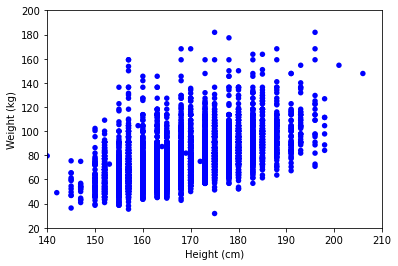

In [225]:
thinkplot.Scatter(heights, weights, alpha=1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

The data fall in obvious columns because they were rounded off.  We can reduce this visual artifact by adding some random noice to the data.

NOTE: The version of `Jitter` in the book uses noise with a uniform distribution.  Here I am using a normal distribution.  The normal distribution does a better job of blurring artifacts, but the uniform distribution might be more true to the data.

In [226]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

Heights were probably rounded off to the nearest inch, which is 2.8 cm, so I'll add random values from -1.4 to 1.4.

In [227]:
heights = Jitter(heights, 1.4)
weights = Jitter(weights, 0.5)

And here's what the jittered data look like.

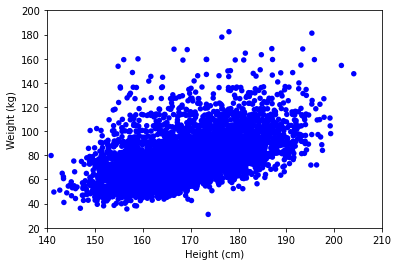

In [228]:
thinkplot.Scatter(heights, weights, alpha=1.0)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

The columns are gone, but now we have a different problem: saturation.  Where there are many overlapping points, the plot is not as dark as it should be, which means that the outliers are darker than they should be, which gives the impression that the data are more scattered than they actually are.

This is a surprisingly common problem, even in papers published in peer-reviewed journals.

We can usually solve the saturation problem by adjusting `alpha` and the size of the markers, `s`.

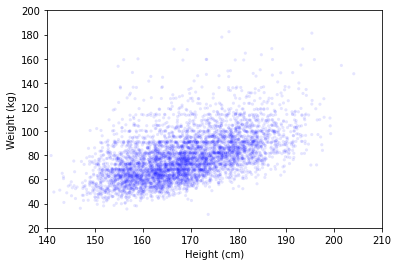

In [229]:
thinkplot.Scatter(heights, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

That's better.  This version of the figure shows the location and shape of the distribution most accurately.  There are still some apparent columns and rows where, most likely, people reported their height and weight using rounded values.  If that effect is important, this figure makes it apparent; if it is not important, we could use more aggressive jittering to minimize it. 

An alternative to a scatter plot is something like a `HexBin` plot, which breaks the plane into bins, counts the number of respondents in each bin, and colors each bin in proportion to its count.

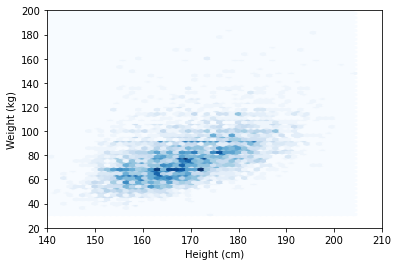

In [230]:
thinkplot.HexBin(heights, weights)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

In this case the binned plot does a pretty good job of showing the location and shape of the distribution.  It obscures the row and column effects, which may or may not be a good thing.

**Exercise:**  So far we have been working with a subset of only 5000 respondents.  When we include the entire dataset, making an effective scatterplot can be tricky.  As an exercise, experiment with `Scatter` and `HexBin` to make a plot that represents the entire dataset well.

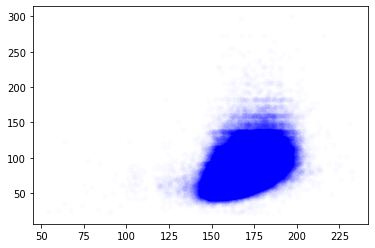

In [231]:
# Solution goes here
#I will work through each of the different aspects of manipulating the plot to achieve the desired visual
# The first component we can work with is the Jitter for each variable. 
# Using jitter adds an offset to overplotted data and the value most likely won't be the same for each variable.
# The heights seem to have more overplotting, so I will increase the jitter to 3
# Still need some jitter on weights, so I will make that one.

# There is still a lot of indistinguishable plots, the graphic is oversaturated.
# I can use alpha to adjust this. 
# At an alpha of .01, I can still visually see outer data points, but cannot lower the alpha anymore.


heights = Jitter(df.htm3, 3)
weights = Jitter(df.wtkg2, 1)

thinkplot.Scatter(heights, weights, alpha=.01)


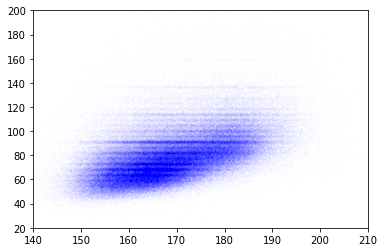

In [232]:
# Solution goes here
# With the alpha this low, it becomes evident that there is whitespace in the plot that can be 
# adjusted by improving the scale fo the x-axis and the size of the points with the s option.
# s of 5 seems a little bit
# s of 2 is better

heights = Jitter(df.htm3, 2.8)
weights = Jitter(df.wtkg2, 1.0)

thinkplot.Scatter(heights, weights, alpha=0.01, s=2)
thinkplot.Config(axis=[140, 210, 20, 200],
                 legend=False)

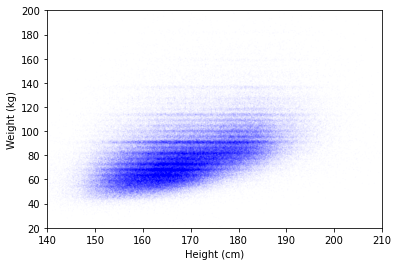

In [233]:
# Solution goes here
#Final product with labels

heights = Jitter(df.htm3, 2.8)
weights = Jitter(df.wtkg2, 1.0)

thinkplot.Scatter(heights, weights, alpha=0.01, s=2)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

## Plotting percentiles

Sometimes a better way to get a sense of the relationship between variables is to divide the dataset into groups using one variable, and then plot percentiles of the other variable.

First I'll drop any rows that are missing height or weight.

In [234]:
cleaned = df.dropna(subset=['htm3', 'wtkg2'])

Then I'll divide the dataset into groups by height.

In [235]:
bins = np.arange(135, 210, 5)
indices = np.digitize(cleaned.htm3, bins)
groups = cleaned.groupby(indices)

Here are the number of respondents in each group:

In [236]:
for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


Now we can compute the CDF of weight within each group.

In [237]:
mean_heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

And then extract the 25th, 50th, and 75th percentile from each group.

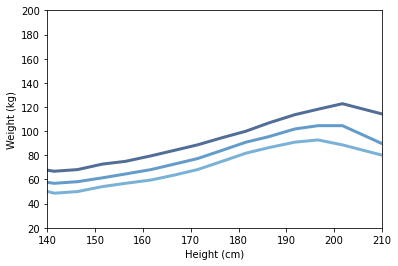

In [238]:
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_heights, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

**Exercise:** Yet another option is to divide the dataset into groups and then plot the CDF for each group.  As an exercise, divide the dataset into a smaller number of groups and plot the CDF for each group.

In [239]:
cleaned = df.dropna(subset=['htm3', 'wtkg2'])
# Solution goes here
# First we will make the height bins larger by 5 than the previous example
# This will give us 8 instead of 15 bins, which will help with the visualization
# The first number specifies the start, second is the stop, and the third number is the step
#Start at 140, go until 210, and increment by 10
bins = np.arange(140, 210, 10)

#Next we need to generate the indices for each bin.
#We use numpy's digitize for this.
#Digitize returns an index for the bin that each height belongs in.
indices = np.digitize(cleaned.htm3, bins)
groups = cleaned.groupby(indices)

for i,group in groups:
    print(i, len(group))


0 533
1 2639
2 64520
3 142748
4 111663
5 63632
6 9561
7 536


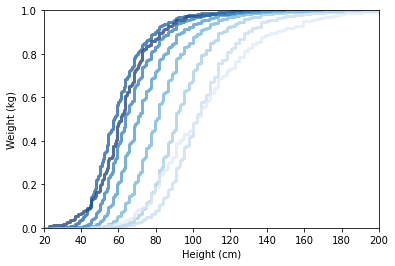

In [240]:
# Now we can make the CDFs for each group
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]
#Now to plot it. 
# First we need to set the number of plots to the length of the cdf list 
thinkplot.PrePlot(len(cdfs))
#Then we can use the Cdfs function
thinkplot.Cdfs(cdfs)
#Finally we need to set labels and rescale axis. Since it is a cdf, biggest change is to y axis for 0 and 1
thinkplot.Config(xlabel='Height (cm)',
                 ylabel="Weight (kg)",
                 axis=[20, 200, 0, 1],
                 legend=False)

## Correlation

The following function computes the covariance of two variables using NumPy's `dot` function.

In [241]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

And here's an example:

In [242]:
heights, weights = cleaned.htm3, cleaned.wtkg2
Cov(heights, weights)

103.33290857697756

Covariance is useful for some calculations, but it doesn't mean much by itself.  The coefficient of correlation is a standardized version of covariance that is easier to interpret.

In [243]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

The correlation of height and weight is about 0.51, which is a moderately strong correlation.

In [244]:
Corr(heights, weights)

0.508736478973459

NumPy provides a function that computes correlations, too:

In [245]:
np.corrcoef(heights, weights)

array([[1.        , 0.50873648],
       [0.50873648, 1.        ]])

The result is a matrix with self-correlations on the diagonal (which are always 1), and cross-correlations on the off-diagonals (which are always symmetric).

Pearson's correlation is not robust in the presence of outliers, and it tends to underestimate the strength of non-linear relationships.

Spearman's correlation is more robust, and it can handle non-linear relationships as long as they are monotonic.  Here's a function that computes Spearman's correlation:

In [246]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

For heights and weights, Spearman's correlation is a little higher:

In [247]:
SpearmanCorr(heights, weights)

0.5405846262320476

A Pandas `Series` provides a method that computes correlations, and it offers `spearman` as one of the options.

In [248]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

The result is the same as for the one we wrote.

In [249]:
SpearmanCorr(heights, weights)

0.5405846262320483

An alternative to Spearman's correlation is to transform one or both of the variables in a way that makes the relationship closer to linear, and the compute Pearson's correlation.

In [250]:
Corr(cleaned.htm3, np.log(cleaned.wtkg2))

0.531728260598344

## Exercises

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [251]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [252]:
# Solution goes here
#Get the age of mother and weight of baby
age = live.agepreg
weight = live.totalwgt_lb
#Find Pearon's correlation coefficient
pearson = Corr(age, weight)

#Find Spearman's correlation coefficient
spearman = SpearmanCorr(age, weight)

print(f"Pearson's correlation is: {pearson}")
print(f"Spearman's correlation is: {spearman}")



Pearson's correlation is: 0.06883397035410904
Spearman's correlation is: 0.09461004109658226


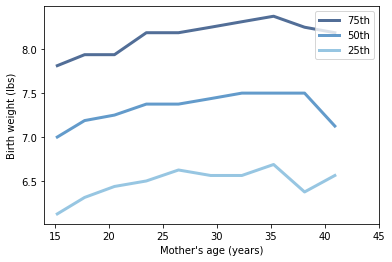

In [253]:
# Solution goes here
#Set the bins for age, to begin at 10, end at 48 and use increments of 3
bins = np.arange(10, 48, 3)
#Digitize ages to the bins and return the indices
indices = np.digitize(live.agepreg, bins)
#arrange groups by indices
groups = live.groupby(indices)

#Use slicing to iterate through the first to the last item and add it to ages and cdfs
ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]
# Set PrePlot to 3, one for each percentage
thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)

thinkplot.Config(xlabel="Mother's age (years)",
                 ylabel='Birth weight (lbs)',
                 xlim=[14, 45], legend=True)
    

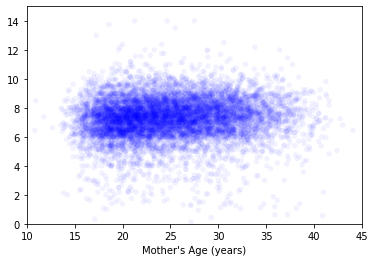

In [254]:
"""
How would you characterize the relationship between these variables?

I would characterize this relationship as weak correlation. 
Both correlations coefficients are weak and the increase for Spearman's indicates that outliers may
be affecting the results. 

It is hard to tell if there is any correlation in the percentile plot. 
There is some evidence of a relationship in ages from 15-25 and weight seems to fall off
for the 50th percentile after 37. 

Using a scatter plot helps demonstrate the density in the younger range

"""

thinkplot.Scatter(age, weight, alpha=.05)
thinkplot.Config(xlabel='Mother\'s Age (years)', yabel='Birthweight (lbs)',
                 xlim=[10,45],
                 ylim=[0,15],
                 legend=False)



# Solution goes here

Conclusions: 

The age of the mother and the birthweight of the baby appear to have a weak relationship.
This is most evident in the percentiles plot, which also shows that birth weight increases
when mothers are between 15 and 25 years of age. 

There is a small difference between the Pearson and Spearman values, which may be due to outliers
or a nonlinear relationship.




# Exercise 8-1

Exercise: In this chapter we used 𝑥¯
and median to estimate µ, and found that 𝑥¯ yields lower MSE. Also, we used 𝑆2 and 𝑆2𝑛−1 to estimate σ, and found that 𝑆2 is biased and 𝑆2𝑛−1 unbiased. Run similar experiments to see if 𝑥¯ and median are biased estimates of µ. Also check whether 𝑆2 or 𝑆2𝑛−1 yields a lower MSE.



In [20]:
import thinkstats2
import random
import numpy as np

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


In [21]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [22]:
def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()


Experiment 1
rmse xbar 0.37988082171693616
rmse median 0.47188737209988996


In [23]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.14905577186859745
mean error unbiased -0.007231733846697007


In [24]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.0104595764909445
rmse Lm 1.896080985064683
mean error L 0.2633844010291924
mean error Lm 0.43957065375083526


In [45]:
# Solution
from sklearn.metrics import mean_squared_error
from scipy import stats
from math import sqrt 

def myEstimate4(n=7, iters=200000):
    """Mean error for xbar and median as estimators of population mean.
    
    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1
    
    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
        
    print("Estimator 1")

    # We can see that the MeanError function is nice, but since we are inputing a zero,
    # It is simply returning the mean of the list.
    # This function is more useful in estimate2 and estimate3 where there is a number besides 0
    print(f"Means xbar: {np.mean(means)}")
    print(f"Means Median: {np.mean(medians)}")
    print(f"Mean Error xbar Thinkstats: {MeanError(means, mu)}")
    print(f"Mean Error Median Thinkstats: {MeanError(medians, mu)}")
    print(f"Standard Error of the Mean: {stats.sem(means)}")
    print(f"Standard Error of the Median: {stats.sem(medians)}")

myEstimate4()



Estimator 1
Means xbar: -0.0011743083619733742
Means Median: -0.0009306352876323507
Mean Error xbar Thinkstats: -0.0011743083619733742
Mean Error Median Thinkstats: -0.0009306352876323507
Standard Error of the Mean: 0.0008464085745559337
Standard Error of the Median: 0.0010274705894462864


## Exercise 8-1
## Run similar experiments to see if 𝑥¯ and median are biased estimates of µ. 

We can see that both xbar and median have low mean error that continues to decreaese as m gets larger.
Therefore, they do not seem to be biased. 


In [49]:
# Solution

def myEstimate5(n=7, iters=500000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    print('Experiment 2')
    sigma2 = list()
    for x in range(0, len(estimates1)):
        sigma2.append(1)
        
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))
    
    #To get RMSE from sklearn, we take the sqrt of mean_squared_error 
    print(f"Root Mean Squared Error biased sklearn: {sqrt(mean_squared_error(estimates1, sigma2))}")
    print(f"Root Mean Squared Error unbiased sklearn: {sqrt(mean_squared_error(estimates2, sigma2))}")

Estimate5()

Experiment 2
RMSE biased 0.5146308979673985
RMSE unbiased 0.57682618897064
Root Mean Squared Error biased sklearn: 0.5146308979673985
Root Mean Squared Error unbiased sklearn: 0.57682618897064


## Check whether 𝑆2 or 𝑆2𝑛−1 yields a lower MSE.
m = 100000
RMSE biased 0.5120592928202613
RMSE unbiased 0.5732961660709213
Root Mean Squared Error biased sklearn: 0.5120592928202613
Root Mean Squared Error unbiased sklearn: 0.5732961660709213

m = 500000
RMSE biased 0.5146308979673985
RMSE unbiased 0.57682618897064
Root Mean Squared Error biased sklearn: 0.5146308979673985
Root Mean Squared Error unbiased sklearn: 0.57682618897064

We can see that the biased (S^2) yields a lower RMSE than the unbiased estimator consistenly as m increases.


standard error 0.7990808503538157
confidence interval (1.4001872345190005, 3.3040809711382466)


0.7990808503538157

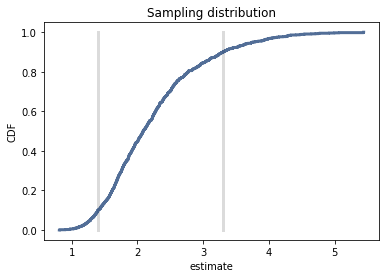

In [59]:
# Solution
import thinkplot
def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(10), cdf.Percentile(90)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution',
                     legend=False)

    return stderr

SimulateSample()

standard error 0.7592324474905132
confidence interval (2.3432578619098123, 4.1646649863073)


0.7592324474905132

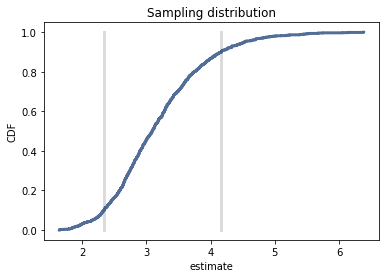

In [71]:
SimulateSample(lam=2, n=20, iters=1000)

standard error 0.30294865267922005
confidence interval (2.6575973997419204, 3.4357615774550365)


0.30294865267922005

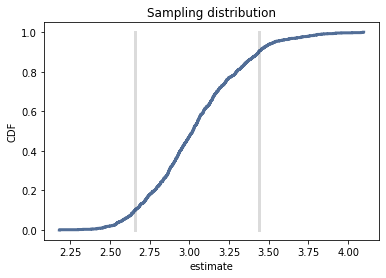

In [69]:
SimulateSample(lam=2, n=100, iters=1000)

standard error 0.09660746059900929
confidence interval (2.888086677154408, 3.130779016346212)


0.09660746059900929

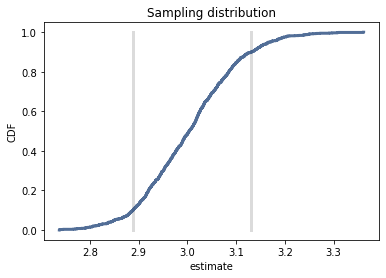

In [70]:
SimulateSample(lam=2, n=1000, iters=1000)

## Exercise 8-2
For n=10:
    
standard error 0.7990808503538157
confidence interval (1.4001872345190005, 3.3040809711382466)

For n=100:
standard error 0.2041819238921046
confidence interval (1.7819880224597373, 2.291312819904265)

for n=1000:
standard error 0.06578862944859469
confidence interval (1.9160532299548996, 2.0880316608625065)


Sample size has a significant effect on the standard error and confidence interval margins.
As n increases, our SE declines and our CI intervals improve. 

The effects of this are really pronounced as the sampling distribution looks more and more like
the CDF for a normalized Gaussian distribution.